Dataset: https://archive.ics.uci.edu/ml/datasets/abalone.

### Predicting the age of abalone from physical measurements

- The Abalone dataset is a collection of physical measurements of abalones, a type of marine mollusk. This dataset is widely used in machine learning and statistical analysis to predict the age of abalones based on various physical attributes.

- The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope. 
    - Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.
    - The dataset provides an alternative by using easily measurable features to estimate age, thus streamlining the assessment process.

- Dataset has 4177 instances and 9 features.
- Rings being an integer type feature can simply help to calculate age as:
    - `Age = Rings + 1.5`

#### Dataset Features:

- Categorical:
    - Sex: M, F and I(Infant)
- Continuous:
    - Length: Longest shell measurement (mm)
    - Diameter: Perpendicular to length (mm)
    - Height: With meat in shell (mm)
    - Whole weight: Whole abalone (g)
    - Shucked weight: Weight of meat (g)
    - Viscera weight: Gut weight (after bleeding) (g)
    - Shell weight: After being dried (g)
- Integers:
    - Rings: +1.5 gives the age in years 

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import shap
shap.initjs()

c:\Users\Dell\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Dataset

In [5]:
# import dataset
df=pd.read_csv("abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
df1=df.copy()
df1

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [10]:
# data.rename(columns={'Sex':'sex', 'Length':'length', 'Diameter':'diameter', 'Height':'height', 'While weight':'whole weight', 'Shucked weight':'shucked weight', 'Viscera weight':'viscera weight', 'Shell weight':'shell weight', 'Rings':'rings'})
# df1.columns['sex', 'length', 'diameter', 'height', 'whole weight', 'shucked weight', 'viscera weight', 'shell weight', 'rings']
# df1

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Text(0.5, 0, 'Whole weight')

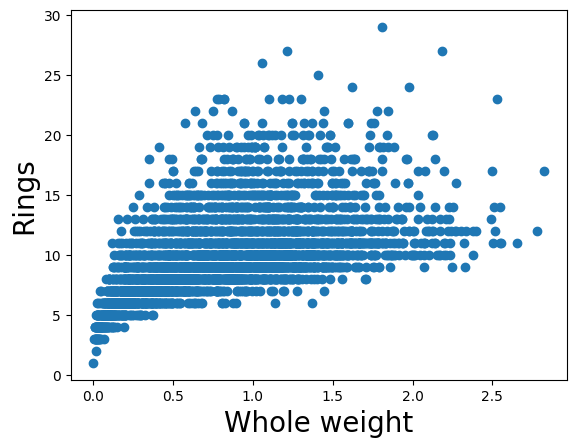

In [20]:
# Plot 1: whole weight
plt.scatter(df1['Whole weight'], df1['Rings'])
plt.ylabel('Rings', size=20)
plt.xlabel('Whole weight', size=20)

Text(0.5, 0, 'Rings')

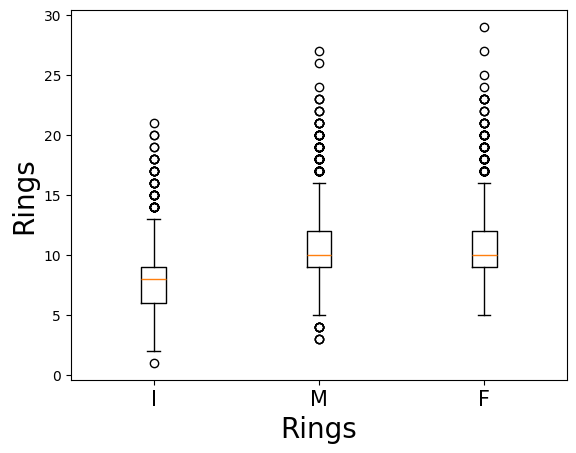

In [21]:
# Plot 2: sex
plt.boxplot(df1[df1.Sex=='I']['Rings'], positions=[1])
plt.boxplot(df1[df1.Sex=='M']['Rings'], positions=[2])
plt.boxplot(df1[df1.Sex=='F']['Rings'], positions=[3])

plt.xticks(ticks=[1,2,3], labels=['I', 'M', 'F'], size=15)
plt.ylabel('Rings', size=20)
plt.xlabel('Rings', size=20)

In [22]:
df1.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<Axes: >

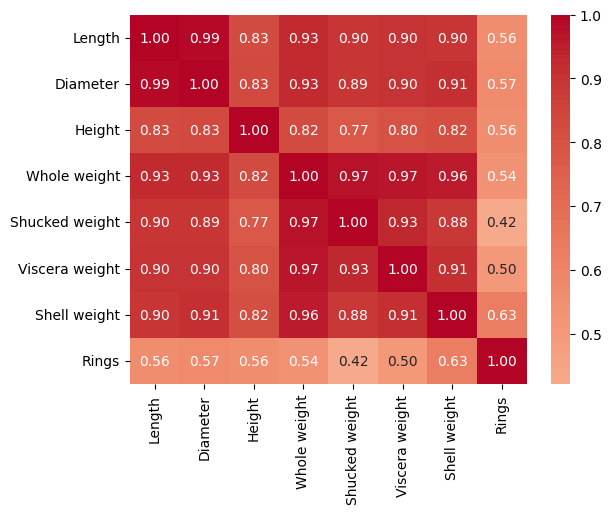

In [24]:
# Plot 3: Correlation heatmap
cont=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

corr_matrix=pd.DataFrame(df1[cont], columns=cont).corr()

import seaborn as sns
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True, fmt='.2f')

### Feature Engineering

In [25]:
y=df1['Rings']
X=df1[['Sex', 'Length', 'Height', 'Shucked weight', 'Viscera weight', 'Shell weight']]

In [26]:
X

,Sex,Length,Height,Shucked weight,Viscera weight,Shell weight
0,M,0.455,0.095,0.2245,0.1010,0.1500
1,M,0.350,0.090,0.0995,0.0485,0.0700
2,F,0.530,0.135,0.2565,0.1415,0.2100
3,M,0.440,0.125,0.2155,0.1140,0.1550
4,I,0.330,0.080,0.0895,0.0395,0.0550
...,...,...,...,...,...,...
4172,F,0.565,0.165,0.3700,0.2390,0.2490
4173,M,0.590,0.135,0.4390,0.2145,0.2605
4174,M,0.600,0.205,0.5255,0.2875,0.3080
4175,F,0.625,0.150,0.5310,0.2610,0.2960


In [27]:
# Create dummy variables
X['Sex.M']=[1 if s=='M' else 0 for s in X['Sex']]
X['Sex.F']=[1 if s=='F' else 0 for s in X['Sex']]
X['Sex.I']=[1 if s=='I' else 0 for s in X['Sex']]
X=X.drop('Sex', axis=1)

X.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8612\950359883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex.M']=[1 if s=='M' else 0 for s in X['Sex']]
C:\Users\Dell\AppData\Local\Temp\ipykernel_8612\950359883.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex.F']=[1 if s=='F' else 0 for s in X['Sex']]


,Length,Height,Shucked weight,Viscera weight,Shell weight,Sex.M,Sex.F,Sex.I
0,0.455,0.095,0.2245,0.1010,0.150,1,0,0
1,0.350,0.090,0.0995,0.0485,0.070,1,0,0
2,0.530,0.135,0.2565,0.1415,0.210,0,1,0
3,0.440,0.125,0.2155,0.1140,0.155,1,0,0
4,0.330,0.080,0.0895,0.0395,0.055,0,0,1


### Modelling

In [28]:
# Train model
model=xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

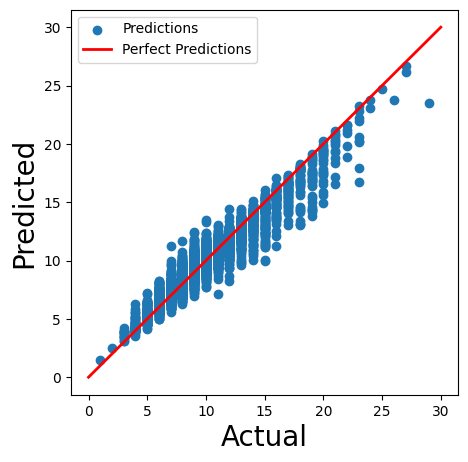

In [39]:
# Get predictions
y_pred=model.predict(X)

# model evaluation
plt.figure(figsize=(5,5))

plt.scatter(y, y_pred)

plt.plot([0,30], [0,30], color='r', linestyle='-', linewidth=2)

plt.ylabel('Predicted', size=20)
plt.xlabel('Actual', size=20)

plt.legend(['Predictions', 'Perfect Predictions'])

### 1) Standard SHAP values

In [41]:
# Get shap values
explainer=shap.Explainer(model)
shap_values=explainer(X) # Calculating Shap values for every feature in feature matrix

In [43]:
np.shape(shap_values.values)

(4177, 8)

## Waterfall plot

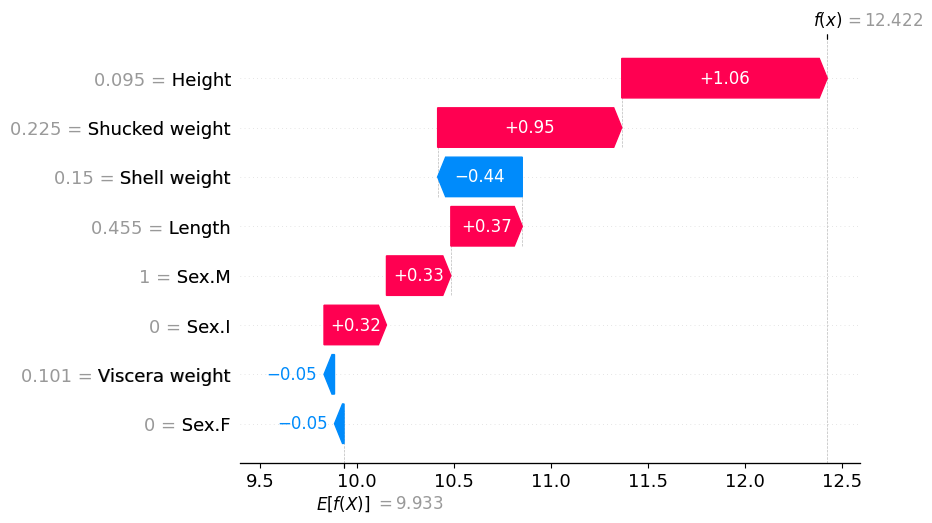

In [44]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

- E[f(x)] -> Average predicted number of rings along all 4177 dataset
- f(x) -> Predicted number of rings
- Shap values: How each mmodel feature has contributed towards the average and predicted values of rings

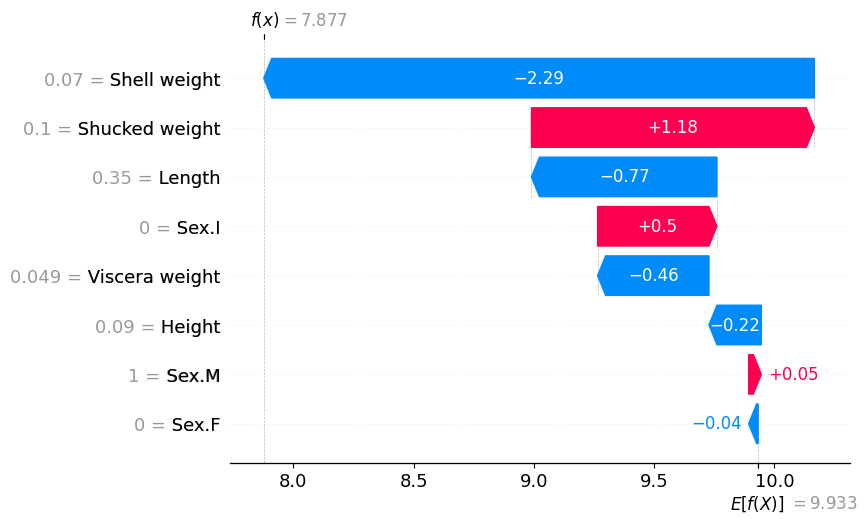

In [52]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[1])

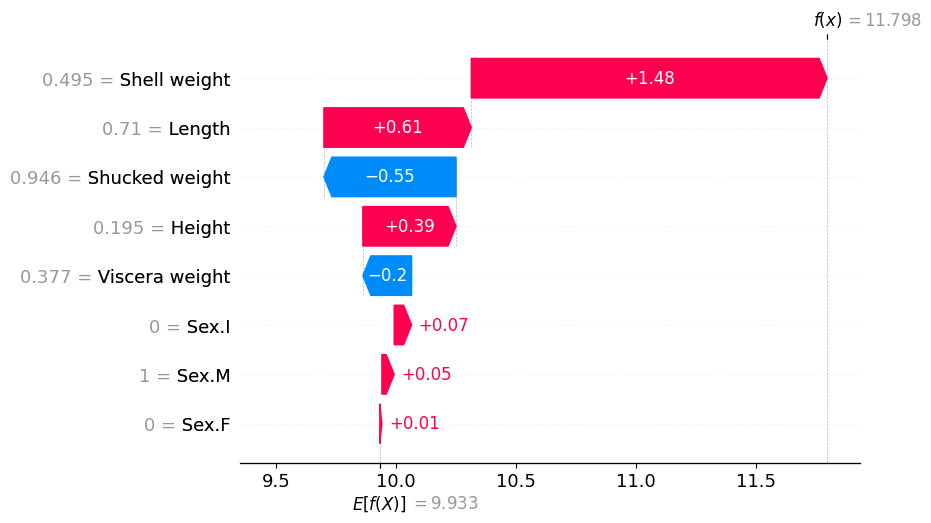

In [64]:
shap.plots.waterfall(shap_values[4176])
# shap_values.shape

### Force plot

In [67]:
shap.plots.force(shap_values[0])

In [71]:
# shap.plots.force(shap_values[1])

### Stacked force plot

In [68]:
shap.plots.force(shap_values[0:100])

#### Absolute Mean plot: Feature making contributions in predictions

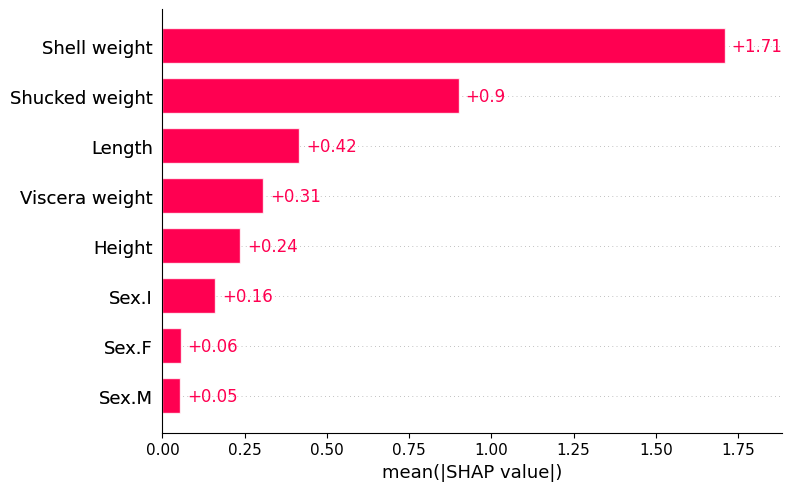

In [69]:
shap.plots.bar(shap_values)

### Beeswarm plot

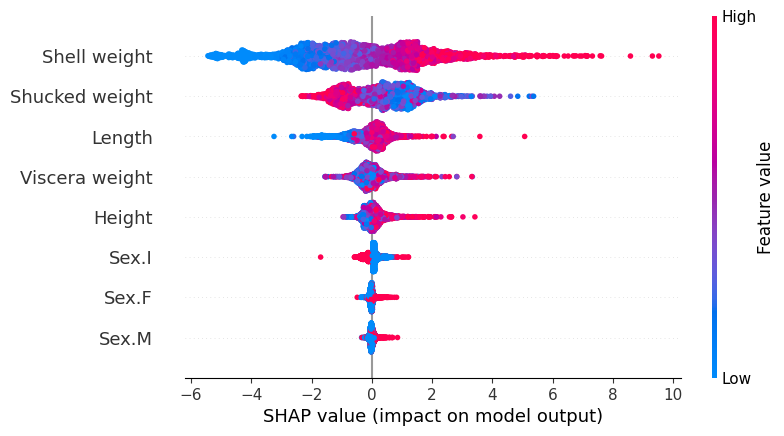

In [72]:
shap.plots.beeswarm(shap_values)

### Dependence plots

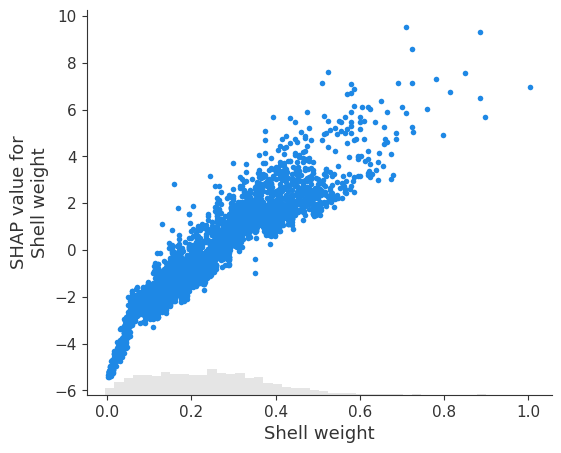

In [74]:
# Plot 1: Shell weight
shap.plots.scatter(shap_values[:, "Shell weight"])

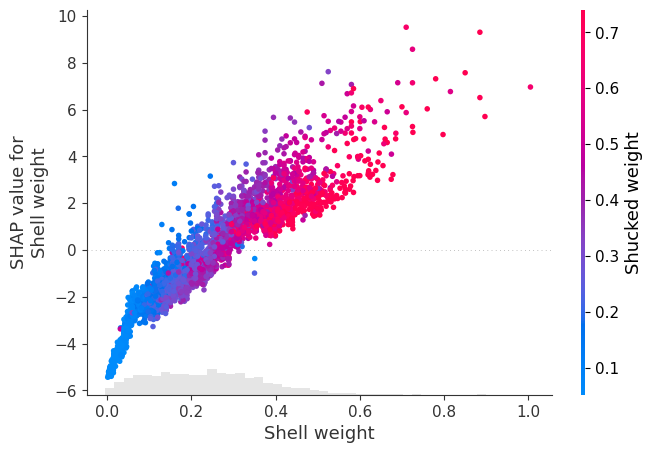

In [76]:
# Using second feature "Shucked weight" to color the scatter plot
shap.plots.scatter(shap_values[:, "Shell weight"], color=shap_values[:, "Shucked weight"])

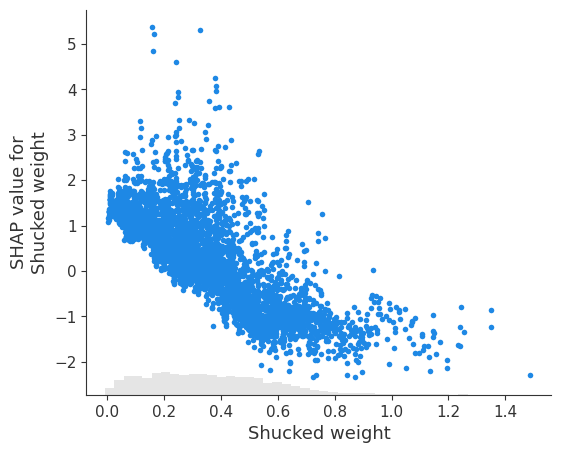

In [77]:
# Plot 2: Shucked weight
shap.plots.scatter(shap_values[:, "Shucked weight"])